In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

df2013 = pd.read_csv("Data_cleaned_2012.csv")
df2012 = pd.read_csv("Data_cleaned_2011.csv")

In [7]:
sns.set(style="whitegrid", color_codes=True)
plt.style.use('ggplot')

In [3]:
df2013.columns

Index(['Unnamed: 0', 'ID', 'Segment ID', 'Roadway Name', 'From', 'To',
       'Direction', 'Date', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM'],
      dtype='object')

In [4]:
df2012.columns

Index(['Unnamed: 0', 'ID', 'GIS ID', 'Roadway Name', 'From', 'To', 'Direction',
       'Date', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [5]:
complete_data_13 = dict()
for index,row in df2013['Segment ID'].iteritems():
    k= (row,df2013['Direction'].loc[index])
    if k not in complete_data_13:
        complete_data_13[k] = dict()
    date = df2013['Date'].loc[index]
    if date not in complete_data_13[k]:
        complete_data_13[k][date] = []
    for tim in df2013.columns[8:]:
        complete_data_13[k][date].append(df2013[tim].loc[index])

print(complete_data_13)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are dictionaries with the date as the key and the values being the traffic volume at each hr 
# (with the index representing the start hr)




avg_traff_per_hr_13 = []
for tim in df2013.columns[8:]:
    avg_traff_per_hr_13.append(np.mean(df2013[tim]))

print(avg_traff_per_hr_13)
# list of the average traffic volumes at different hrs
# (with the index representing the start hr)



avg_traff_per_rd_hr_13 = dict()
for index,row in df2013['Segment ID'].iteritems():
    j = (row,df2013['Direction'].loc[index])
    if j not in avg_traff_per_rd_hr_13:
        avg_traff_per_rd_hr_13[j] = [0 for i in range(24)]
    cnt = 0
    for tim in df2013.columns[8:]:
        avg_traff_per_rd_hr_13[j][cnt] = (avg_traff_per_rd_hr_13[j][cnt]+df2013[tim].loc[index])
        cnt = cnt+1
for j in complete_data_13:
    l = len(complete_data_13[j])
    for i in range(24):
        avg_traff_per_rd_hr_13[j][i] = avg_traff_per_rd_hr_13[j][i]/l

print(avg_traff_per_rd_hr_13)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are lists containing the average traffic volume at each hr on that road
# (with the index representing the start hr)



peak_hr_per_rd = avg_traff_per_rd_hr_13.copy()
for i in peak_hr_per_rd:
    peak_hr_per_rd[i] = peak_hr_per_rd[i].index(max(peak_hr_per_rd[i]))

print(peak_hr_per_rd)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values indicate the hr at which there is maximum volume of traffic on that road



min_traff_hr_per_rd = avg_traff_per_rd_hr_13.copy()
for i in min_traff_hr_per_rd:
    min_traff_hr_per_rd[i] = min_traff_hr_per_rd[i].index(min(min_traff_hr_per_rd[i]))

print(min_traff_hr_per_rd)    
# dictionary with the keys as tuples of the segment code and the direction.
# And the values indicate the hr at which there is minimum volume of traffic on that road




avg_traffic_per_road = avg_traff_per_rd_hr_13.copy()
for i in avg_traffic_per_road:
    avg_traffic_per_road[i] = np.mean(avg_traffic_per_road[i])

print(avg_traffic_per_road)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are the average traffic volumes on the respective roads




rds_sorted_acd_traff = sorted(avg_traffic_per_road, key = lambda i:avg_traffic_per_road[i])

print(rds_sorted_acd_traff)
# list of tuples of the segment code and the direction
# in the increasing order of average traffic volumes


road_desc = dict()
for index,row in df2013['Segment ID'].iteritems():
    k= (row,df2013['Direction'].loc[index])
    if k not in road_desc:
        road_desc[k] = dict()
    road_desc[k]['From'] = df2013['From'].loc[index]
    road_desc[k]['To'] = df2013['To'].loc[index]
    
print(road_desc)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are dictionaries containing the from and to direction.



traff_per_dir = {'NB':[],'SB':[],'WB':[],'EB':[]}
for i in avg_traff_per_rd_hr_13:
    if 'NB' in i[1]:
        traff_per_dir['NB'].append(avg_traff_per_rd_hr_13[i])
    elif 'SB' in i[1]:
        traff_per_dir['SB'].append(avg_traff_per_rd_hr_13[i])
    elif 'EB' in i[1]:
        traff_per_dir['EB'].append(avg_traff_per_rd_hr_13[i])
    elif 'WB' in i[1]:
        traff_per_dir['WB'].append(avg_traff_per_rd_hr_13[i])

print(traff_per_dir)
# dictionary with the keys as the four main directions
# and the values are lists with all the hourly entries of that direction


avg_traff_per_dir = {'NB':[],'SB':[],'WB':[],'EB':[]}        
for i in traff_per_dir:
    for j in range(24):
        tot = 0
        for k in range(len(traff_per_dir[i])):
            tot = tot + traff_per_dir[i][k][j]
        avg = tot / len(traff_per_dir[i])
        avg_traff_per_dir[i].append(avg)
        
print(avg_traff_per_dir)
# dictionary with the keys as the four main directions
# and the values are lists with all the average hourly entry of that direction

{(2153, 'NB'): {'02-02-2013': [106, 74, 45, 29, 29, 45, 71, 145, 213, 278, 387, 335, 406, 411, 371, 398, 324, 394, 379, 329, 249, 197, 187, 169], '02-03-2013': [109, 74, 55, 37, 26, 25, 47, 74, 111, 204, 249, 351, 374, 350, 308, 291, 313, 253, 242, 217, 210, 144, 125, 79], '02-04-2013': [36, 28, 11, 16, 32, 108, 168, 418, 493, 263, 282, 307, 304, 328, 426, 425, 419, 469, 425, 358, 224, 185, 132, 74], '02-05-2013': [42, 28, 16, 12, 34, 109, 193, 397, 499, 241, 255, 294, 310, 382, 393, 479, 441, 476, 446, 424, 305, 219, 171, 76], '02-06-2013': [35, 38, 12, 14, 31, 98, 195, 372, 490, 297, 260, 283, 334, 324, 383, 384, 391, 369, 401, 338, 236, 186, 123, 76], '02-07-2013': [33, 26, 14, 22, 31, 100, 171, 382, 460, 273, 215, 263, 254, 303, 151, 409, 422, 364, 356, 339, 275, 225, 169, 104], '02-08-2013': [35, 28, 18, 14, 34, 89, 202, 306, 440, 290, 236, 282, 343, 353, 430, 518, 461, 485, 531, 393, 351, 276, 242, 154], '02-09-2013': [110, 73, 46, 32, 29, 44, 73, 150, 217, 283, 395, 342, 414, 41

{(2153, 'NB'): [59.69230769230769, 44.46153846153846, 26.46153846153846, 22.23076923076923, 31.53846153846154, 82.53846153846153, 147.15384615384616, 301.53846153846155, 387.0, 263.9230769230769, 272.9230769230769, 306.61538461538464, 332.61538461538464, 352.0769230769231, 348.9230769230769, 410.53846153846155, 393.3076923076923, 398.7692307692308, 392.53846153846155, 342.46153846153845, 257.3076923076923, 198.6153846153846, 157.6153846153846, 103.0], (2153, 'SB'): [68.6923076923077, 40.61538461538461, 27.923076923076923, 21.615384615384617, 32.53846153846154, 71.6923076923077, 183.23076923076923, 292.7692307692308, 254.30769230769232, 207.0, 205.15384615384616, 244.46153846153845, 267.2307692307692, 277.7692307692308, 336.38461538461536, 366.6923076923077, 347.6923076923077, 332.3076923076923, 328.2307692307692, 274.15384615384613, 211.15384615384616, 154.0, 114.3076923076923, 91.15384615384616], (6644, 'NB'): [63.666666666666664, 37.888888888888886, 27.555555555555557, 25.88888888888

{(2153, 'NB'): {'From': 'WOODROW RD', 'To': 'STAFFORD AVE'}, (2153, 'SB'): {'From': 'WOODROW RD', 'To': 'STAFFORD AVE'}, (6644, 'NB'): {'From': 'EDINBORO ROAD', 'To': 'FOREST HILL ROAD'}, (6644, 'SB'): {'From': 'EDINBORO ROAD', 'To': 'FOREST HILL ROAD'}, (7564, 'EB'): {'From': 'DALTON  AVENUE', 'To': 'EBONY STREET'}, (11599, 'NB'): {'From': 'BUTTERWORTH AVENUE', 'To': 'COVERLY AVENUE'}, (11599, 'SB'): {'From': 'BUTTERWORTH AVENUE', 'To': 'COVERLY AVENUE'}, (12945, 'WB'): {'From': 'CAYUGA AVENUE', 'To': 'RENWICK AVENUE'}, (13133, 'NB'): {'From': 'HOWARD AVENUE', 'To': 'LITTLE CLOVE ROAD'}, (13133, 'SB'): {'From': 'HOWARD AVENUE', 'To': 'LITTLE CLOVE ROAD'}, (14602, 'NB'): {'From': 'FINGERBOARD ROAD', 'To': 'RODERICK AVENUE'}, (14602, 'SB'): {'From': 'FINGERBOARD ROAD', 'To': 'RODERICK AVENUE'}, (17319, 'EB'): {'From': '7 AVENUE', 'To': '14 AVENUE'}, (17319, 'WB'): {'From': '7 AVENUE', 'To': '14 AVENUE'}, (17652, 'NB'): {'From': '68 STREET', 'To': 'SENATOR STREET'}, (17652, 'SB'): {'From

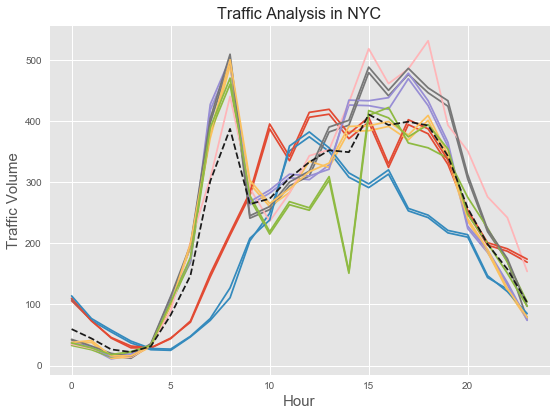

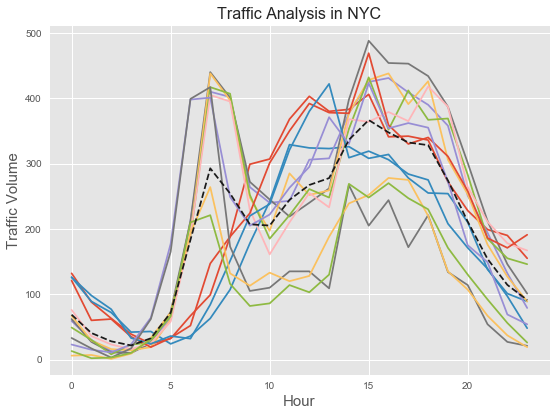

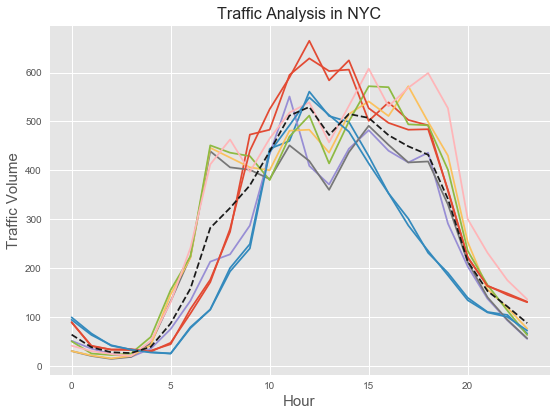

{(2153, 'NB'): 3,
 (2153, 'SB'): 3,
 (6644, 'NB'): 3,
 (6644, 'SB'): 3,
 (7564, 'EB'): 3,
 (11599, 'NB'): 3,
 (11599, 'SB'): 4,
 (12945, 'WB'): 4,
 (13133, 'NB'): 3,
 (13133, 'SB'): 3,
 (14602, 'NB'): 3,
 (14602, 'SB'): 3,
 (17319, 'EB'): 4,
 (17319, 'WB'): 3,
 (17652, 'NB'): 2,
 (17652, 'SB'): 3,
 (18635, 'EB'): 3,
 (18635, 'WB'): 3,
 (18641, 'EB'): 3,
 (18641, 'WB'): 3,
 (18653, 'WB'): 4,
 (18846, 'NB'): 4,
 (19202, 'NB'): 4,
 (19202, 'SB'): 5,
 (19244, 'EB'): 4,
 (19244, 'WB'): 3,
 (19313, 'EB'): 4,
 (19313, 'WB'): 4,
 (19437, 'EB'): 4,
 (19437, 'WB'): 3,
 (19463, 'NB'): 3,
 (19463, 'SB'): 4,
 (19566, 'EB'): 4,
 (19566, 'WB'): 3,
 (19641, 'NB'): 3,
 (19641, 'SB'): 3,
 (19761, 'NB'): 3,
 (19761, 'SB'): 3,
 (19805, 'EB'): 3,
 (19805, 'WB'): 4,
 (19813, 'EB'): 3,
 (19813, 'WB'): 4,
 (19991, 'NB'): 3,
 (19991, 'SB'): 3,
 (20157, 'EB'): 3,
 (20157, 'WB'): 3,
 (20278, 'EB'): 3,
 (20278, 'WB'): 3,
 (20335, 'EB'): 4,
 (20335, 'WB'): 3,
 (20340, 'NB'): 3,
 (20340, 'SB'): 3,
 (20561, 'NB'): 3

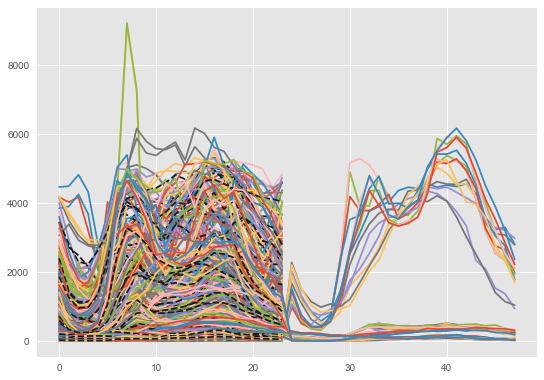

In [15]:

# 1. Visualizing the traffic for any five roads : 
#     1. Find the hourly traffic mean for each road.
#     2. Minimum, Maximum peak of each road.



# Visualizing the traffic
cnt = 0
for j in complete_data_13:
    cnt +=1
    for i in complete_data_13[j]:
        plt.plot(complete_data_13[j][i])
    plt.plot(avg_traff_per_rd_hr_13[j],'--',color = 'k',)
    if cnt<4:
        plt.xlabel("Hour", fontsize=15)
        plt.ylabel("Traffic Volume", fontsize=15)
        plt.title("Traffic Analysis in NYC", fontsize=16)
        plt.show()
        
# Find the hourly traffic mean for each road.
avg_traff_per_rd_hr_13
# Minimum, Maximum peak of each road.
peak_hr_per_rd
min_traff_hr_per_rd

In [10]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [16]:

# 2. top five Busiest roads in the city outcome of 1. : Average Traffic., WHY is it busy?

print('Top five Busiest roads/transitions in the city in Increasing order\n')
for i in rds_sorted_acd_traff[-5:]:
    print(road_desc[i]['From'],'-------',road_desc[i]['To'],'-------',i)

Top five Busiest roads/transitions in the city in Increasing order

 107 AVENUE   -------  115 AVENUE   ------- (65634, 'SB')
 107 AVENUE   -------  115 AVENUE   ------- (65634, 'NB')
 MARMION AVENUE  -------  PROSPECT AVENUE  ------- (154454, 'EB')
EAST 27 STREET ------- EAST 28 STREET ------- (34659, 'SB')
 EAST 59 STREET   -------  EAST 60 STREET   ------- (192292, 'SB')


In [17]:

# 3. find the average hourly volume of traffic in the entire city

avg_traff_per_hr_13

[268.43380992430616,
 199.68158116063918,
 158.83296888141294,
 138.62506307821698,
 145.5833473507149,
 181.39714045416315,
 299.0724978973928,
 450.122960470984,
 517.3359125315391,
 496.2968881412952,
 487.86913372582,
 501.3640033641716,
 519.2874684608915,
 533.8694701429773,
 568.744827586207,
 599.0565180824223,
 599.8285954583683,
 600.6955424726661,
 579.2768713204373,
 522.2104289318755,
 459.7690496215307,
 403.86105971404544,
 362.1286795626577,
 318.7017661900757]

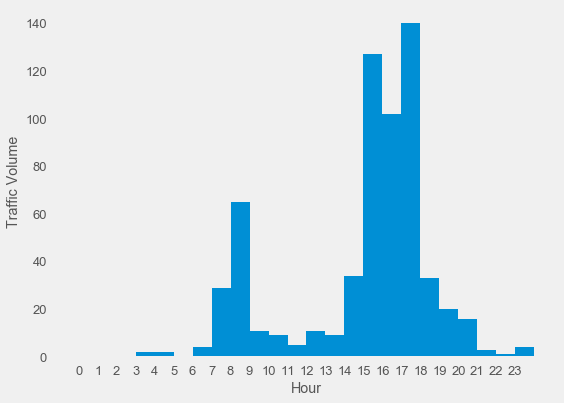

In [25]:

# 4. Peak hour of all roads, Mode of it to find the busiest hour in the city, the least busy hour. WHY?
#sns.set_context('talk')
#plt.style.use('fivethirtyeight')
plt.hist(list(peak_hr_per_rd.values()),range(0,24+1,1))
plt.xticks(range(24))

plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.grid()
plt.show()

# can be observed that ....max ,min, local maxima, minima

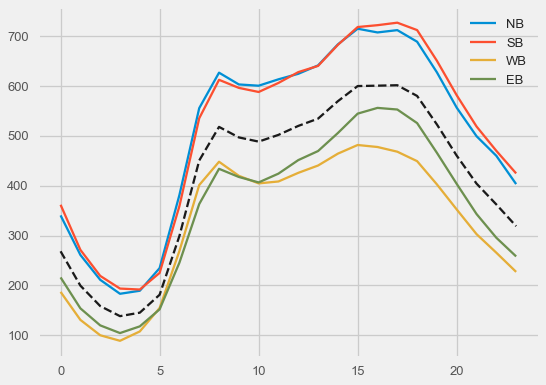

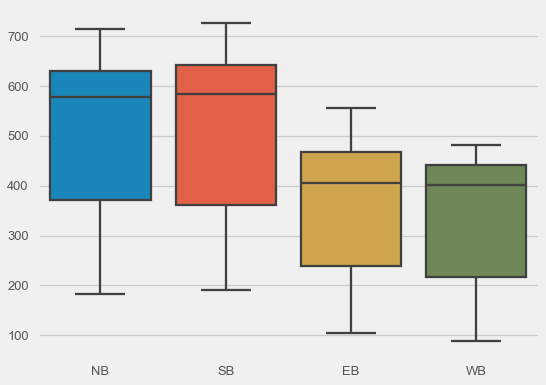

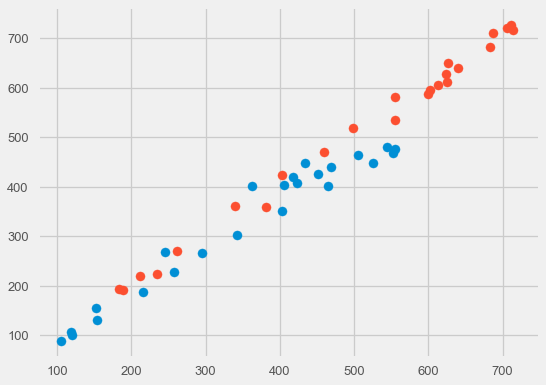

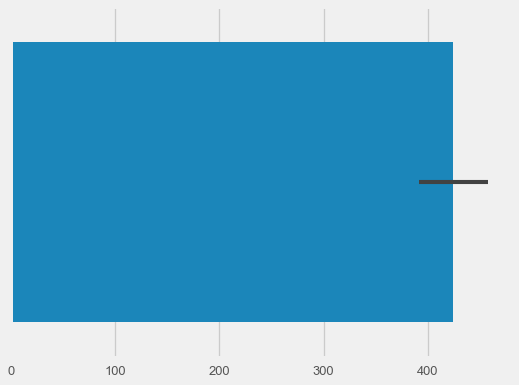

In [26]:

# 9. Analysing the north-south-east-west movement of traffic

for j in avg_traff_per_dir:
    plt.plot(avg_traff_per_dir[j])
plt.plot(avg_traff_per_hr_13,'--',color = 'k'  )
plt.legend(avg_traff_per_dir)
plt.show()
sns.boxplot(['NB','SB','EB','WB'],[avg_traff_per_dir['NB'],avg_traff_per_dir['SB'],avg_traff_per_dir['EB'],avg_traff_per_dir['WB']])
plt.show()
plt.scatter(avg_traff_per_dir['EB'],avg_traff_per_dir['WB'])
plt.scatter(avg_traff_per_dir['NB'],avg_traff_per_dir['SB'])
plt.show()
sns.barplot([avg_traff_per_dir['NB'],avg_traff_per_dir['SB'],avg_traff_per_dir['EB'],avg_traff_per_dir['WB']])
plt.show()

In [27]:
complete_data_12 = dict()
for index,row in df2012['GIS ID'].iteritems():
    k= (row,df2012['Direction'].loc[index])
    if k not in complete_data_12:
        complete_data_12[k] = dict()
    date = df2012['Date'].loc[index]
    if date not in complete_data_12[k]:
        complete_data_12[k][date] = []
    for tim in df2012.columns[8:]:
        complete_data_12[k][date].append(df2012[tim].loc[index])

print(complete_data_12)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are dictionaries with the date as the key and the values being the traffic volume at each hr 
# (with the index representing the start hr)




avg_traff_per_hr_12 = []
for tim in df2012.columns[8:]:
    avg_traff_per_hr_12.append(np.mean(df2012[tim]))

print(avg_traff_per_hr_12)
# list of the average traffic volumes at different hrs
# (with the index representing the start hr)



avg_traff_per_rd_hr_12 = dict()
for index,row in df2012['GIS ID'].iteritems():
    j = (row,df2012['Direction'].loc[index])
    if j not in avg_traff_per_rd_hr_12:
        avg_traff_per_rd_hr_12[j] = [0 for i in range(24)]
    cnt = 0
    for tim in df2012.columns[8:]:
        avg_traff_per_rd_hr_12[j][cnt] = (avg_traff_per_rd_hr_12[j][cnt]+df2012[tim].loc[index])
        cnt = cnt+1
for j in complete_data_12:
    l = len(complete_data_12[j])
    for i in range(24):
        avg_traff_per_rd_hr_12[j][i] = avg_traff_per_rd_hr_12[j][i]/l

print(avg_traff_per_rd_hr_12)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are lists containing the average traffic volume at each hr on that road
# (with the index representing the start hr)



peak_hr_per_rd = avg_traff_per_rd_hr_12.copy()
for i in peak_hr_per_rd:
    peak_hr_per_rd[i] = peak_hr_per_rd[i].index(max(peak_hr_per_rd[i]))

print(peak_hr_per_rd)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values indicate the hr at which there is maximum volume of traffic on that road



min_traff_hr_per_rd = avg_traff_per_rd_hr_12.copy()
for i in min_traff_hr_per_rd:
    min_traff_hr_per_rd[i] = min_traff_hr_per_rd[i].index(min(min_traff_hr_per_rd[i]))

print(min_traff_hr_per_rd)    
# dictionary with the keys as tuples of the segment code and the direction.
# And the values indicate the hr at which there is minimum volume of traffic on that road




avg_traffic_per_road = avg_traff_per_rd_hr_12.copy()
for i in avg_traffic_per_road:
    avg_traffic_per_road[i] = np.mean(avg_traffic_per_road[i])

print(avg_traffic_per_road)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are the average traffic volumes on the respective roads




rds_sorted_acd_traff = sorted(avg_traffic_per_road, key = lambda i:avg_traffic_per_road[i])

print(rds_sorted_acd_traff)
# list of tuples of the segment code and the direction
# in the increasing order of average traffic volumes


road_desc = dict()
for index,row in df2012['GIS ID'].iteritems():
    k= (row,df2012['Direction'].loc[index])
    if k not in road_desc:
        road_desc[k] = dict()
    road_desc[k]['From'] = df2012['From'].loc[index]
    road_desc[k]['To'] = df2012['To'].loc[index]
    
print(road_desc)
# dictionary with the keys as tuples of the segment code and the direction.
# And the values are dictionaries containing the from and to direction.



traff_per_dir = {'NB':[],'SB':[],'WB':[],'EB':[]}
for i in avg_traff_per_rd_hr_12:
    if 'NB' in i[1]:
        traff_per_dir['NB'].append(avg_traff_per_rd_hr_12[i])
    elif 'SB' in i[1]:
        traff_per_dir['SB'].append(avg_traff_per_rd_hr_12[i])
    elif 'EB' in i[1]:
        traff_per_dir['EB'].append(avg_traff_per_rd_hr_12[i])
    elif 'WB' in i[1]:
        traff_per_dir['WB'].append(avg_traff_per_rd_hr_12[i])

print(traff_per_dir)
# dictionary with the keys as the four main directions
# and the values are lists with all the hourly entries of that direction


avg_traff_per_dir = {'NB':[],'SB':[],'WB':[],'EB':[]}        
for i in traff_per_dir:
    for j in range(24):
        tot = 0
        for k in range(len(traff_per_dir[i])):
            tot = tot + traff_per_dir[i][k][j]
        avg = tot / len(traff_per_dir[i])
        avg_traff_per_dir[i].append(avg)
        
print(avg_traff_per_dir)
# dictionary with the keys as the four main directions
# and the values are lists with all the average hourly entry of that direction





{(15540.0, 'NB'): {'01-09-2012': [20.0, 10.0, 11.0, 14.0, 13.0, 20.0, 34.0, 66.0, 100.0, 52.0, 68.0, 85.0, 85.0, 94.0, 104.0, 105.0, 147.0, 120.0, 91.0, 83.0, 74.0, 49.0, 42.0, 42.0], '01-10-2012': [21.0, 16.0, 8.0, 6.0, 13.0, 13.0, 31.0, 70.0, 67.0, 45.0, 57.0, 67.0, 73.0, 95.0, 102.0, 98.0, 133.0, 131.0, 95.0, 73.0, 70.0, 63.0, 42.0, 35.0], '01-11-2012': [27.0, 14.0, 6.0, 5.0, 12.0, 16.0, 34.0, 75.0, 69.0, 71.0, 67.0, 70.0, 90.0, 89.0, 115.0, 115.0, 130.0, 143.0, 106.0, 89.0, 68.0, 64.0, 56.0, 43.0], '01-12-2012': [22.0, 7.0, 7.0, 8.0, 11.0, 12.0, 33.0, 75.0, 89.0, 66.0, 70.0, 60.0, 105.0, 103.0, 71.0, 127.0, 122.0, 144.0, 122.0, 76.0, 64.0, 58.0, 64.0, 43.0], '01-13-2012': [31.0, 17.0, 7.0, 5.0, 13.0, 28.0, 29.0, 68.0, 84.0, 64.0, 83.0, 89.0, 88.0, 113.0, 113.0, 126.0, 133.0, 135.0, 102.0, 106.0, 58.0, 58.0, 55.0, 54.0], '01-14-2012': [42.0, 27.0, 21.0, 18.0, 21.0, 13.0, 17.0, 18.0, 46.0, 53.0, 29.0, 101.0, 112.0, 117.0, 141.0, 151.0, 146.0, 151.0, 120.0, 97.0, 77.0, 67.0, 57.0, 48.

KeyError: (nan, nan)

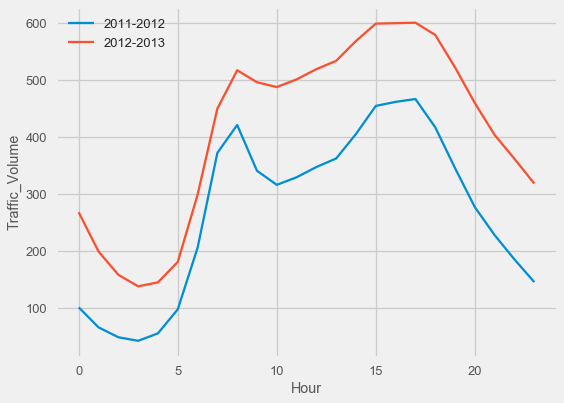

In [32]:
plt.plot(avg_traff_per_hr_12)
plt.plot(avg_traff_per_hr_13)

plt.xlabel("Hour")
plt.ylabel("Traffic_Volume")
plt.legend(['2011-2012','2012-2013'])
plt.show()